In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
import matplotlib as mpl

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [11]:
sn000 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', 0, combineFiles=True)
sn001 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', 1, combineFiles=True)
sn050 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4/output', 50, combineFiles=True)
sn100 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', 100, combineFiles=True)
sn150 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', 150, combineFiles=True)
sn200 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', 200, combineFiles=True)
sn300 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', 300, combineFiles=True)

In [12]:
def compute_T(sn):
    u = sn.part0.InternalEnergy.value
    xe = sn.part0.ElectronAbundance
    
    gamma=5/3
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    kB = 1.381E-16
    
    T = (gamma - 1.) * (u/kB) * 1E10 * mu
    return T

def compute_n(sn):
    rho = np.copy(sn.part0.Density.value)
    xe  = sn.part0.ElectronAbundance
    # print(rho[rho>0])
    
    #convert rho to cgs
    UnitMass   = sn.parameters.UnitMass_in_g
    UnitLength = sn.parameters.UnitLength_in_cm
    rho *= UnitMass/UnitLength**3
    # print(UnitMass/UnitLength**3)
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    # print(np.median(mu))
    # print(np.where(np.isnan(rho[rho>0]))[0])
    # print(rho[:10])
    
    n = rho / mu
    
    return n
    

In [13]:
T000 = compute_T(sn000)
n000 = compute_n(sn000)
m000 = sn000.part0.mass.value

T001 = compute_T(sn001)
n001 = compute_n(sn001)
m001 = sn001.part0.mass.value

T050 = compute_T(sn050)
n050 = compute_n(sn050)
m050 = sn050.part0.mass.value

T100 = compute_T(sn100)
n100 = compute_n(sn100)
m100 = sn100.part0.mass.value

T150 = compute_T(sn150)
n150 = compute_n(sn150)
m150 = sn150.part0.mass.value

T200 = compute_T(sn200)
n200 = compute_n(sn200)
m200 = sn200.part0.mass.value

T300 = compute_T(sn300)
n300 = compute_n(sn300)
m300 = sn300.part0.mass.value

[(-6.0, 5.0), (1.0, 7.0)]

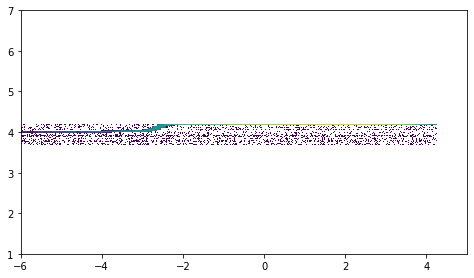

In [6]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n000), np.log10(T000), m000, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))


[(-6.0, 5.0), (1.0, 7.0)]

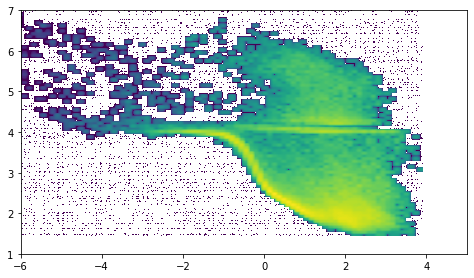

In [7]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n001), np.log10(T001), m001, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))


In [16]:
T001[np.argmax(sn001.part0.mass/sn001.part0.rho)]

4821.047

In [17]:
n001[np.argmax(sn001.part0.mass/sn001.part0.rho)]

6.876184e-08

In [17]:
np.sum(sn000.part4.mass.value)*1E10/5E6

2.782209776341915

[Text(0.5, 0, 'log(n) [cm^-3]'), Text(0, 0.5, 'log(T) [K]')]

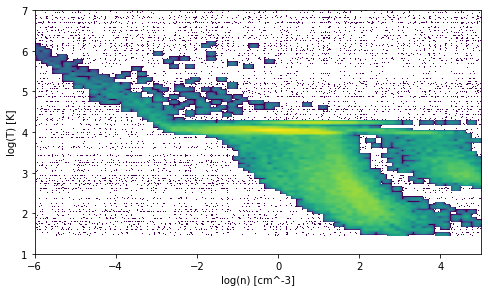

In [14]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n050), np.log10(T050), m050, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))

ax.set(xlabel='log(n) [cm^-3]', ylabel='log(T) [K]')


[(-6.0, 5.0), (1.0, 7.0)]

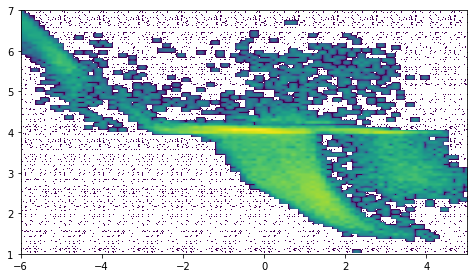

In [21]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n100), np.log10(T100), m100, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))


[(-6.0, 5.0), (1.0, 7.0)]

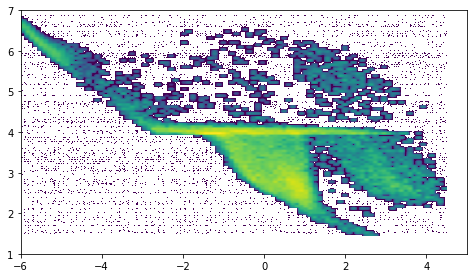

In [8]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n200), np.log10(T200), m200, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))


[(-6.0, 5.0), (1.0, 7.0)]

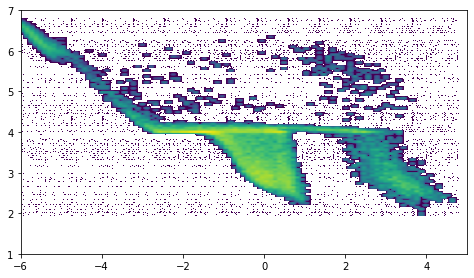

In [11]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n300), np.log10(T300), m300, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))


### new smuggle snap 050

In [95]:
sn050 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4/output', 50, combineFiles=True)

In [96]:
T050 = compute_T(sn050)
n050 = compute_n(sn050)
m050 = sn050.part0.mass.value

[Text(0.5, 0, 'logn [cm^-3]'), Text(0, 0.5, 'logT [K]')]

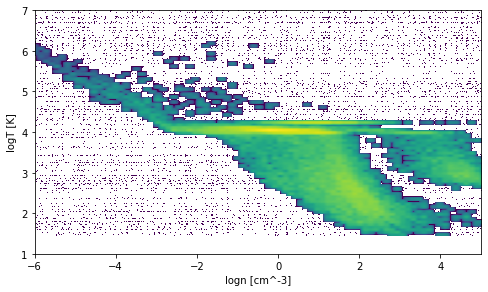

In [35]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n050), np.log10(T050), m050, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))
ax.set(xlabel='logn [cm^-3]', ylabel='logT [K]')


In [46]:
keyT = np.logical_and(np.log10(T050) > 2.8, np.log10(T050) < 3.5)
keyn = np.logical_and(np.log10(n050) > 3.5, np.log10(n050) < 4.5)
keyweird = np.logical_and(keyT, keyn)

In [40]:
from numba import njit
from scipy.spatial import cKDTree

In [43]:
nres = 1024

@njit
def create_plot_pos(x, y, nres):
    plot_pos = np.zeros((nres*nres, 3))
    for i in range(len(x)):
        for j in range(len(y)):
            plot_pos[i*nres + j][0]=x[i][0]
            plot_pos[i*nres + j][1]=y[0][j]

    return plot_pos

x, z = np.meshgrid(np.linspace(-8, 8, nres), np.linspace(-8, 8, nres), indexing='ij')
plot_pos = create_plot_pos(x, z, nres)

In [48]:
sn = sn050
center = np.array([sn.BoxSize, sn.BoxSize, sn.BoxSize])/2.
pos_gas = sn.part0.pos.value - center
dens_gas = sn.part0.rho.value

dens_gas[np.logical_not(keyweird)] = 0.0

tree = cKDTree(pos_gas)
_, key = tree.query(plot_pos)

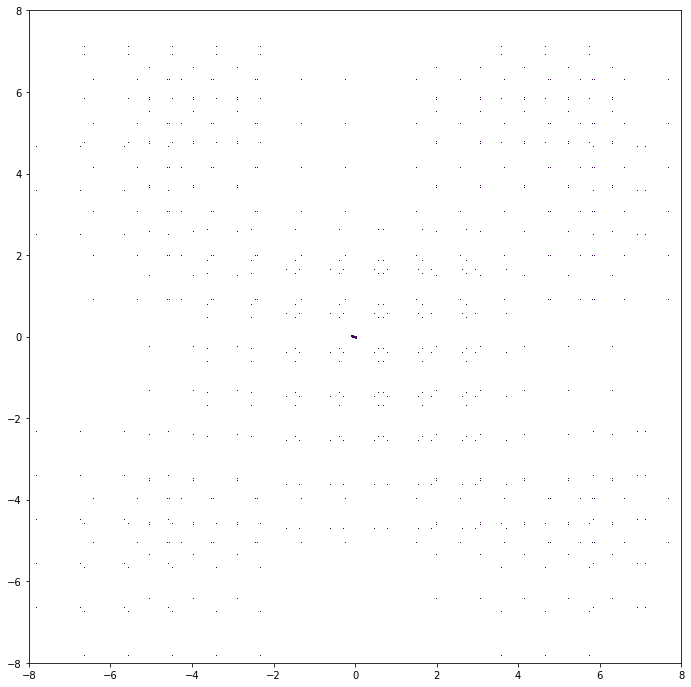

In [49]:
plot_dens = dens_gas[key]
plot_dens_map = np.reshape(plot_dens, (nres, nres))

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
extent = [-8, 8, -8, 8]
ax.imshow(plot_dens_map.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
# ax.imshow(plot_SFR_map.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(), cmap='Reds', alpha=1)
plt.show()

Text(0.5, 0, 'r [kpc]')

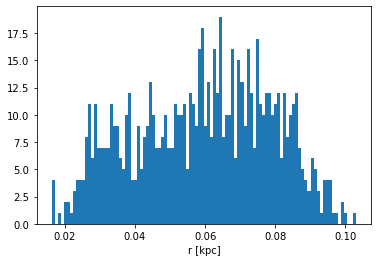

In [53]:
r = np.linalg.norm(sn.part0.pos[keyweird] - np.array([50., 50., 50]), axis=1)
plt.hist(r, bins=100)
plt.xlabel('r [kpc]')

In [85]:
import astropy.units as u

In [115]:
energy = sn.part0.InternalEnergy.value * sn.part0.Density.value
energy = energy * (u.km/u.s)**2 * (1E10*u.Msun/u.kpc**3)
cooling_rate = sn.part0.GFM_CoolingRate.value * u.cm**3 * u.erg/u.s
cooling_rate *= n050 * n050 / u.cm**6

cooling_time = (energy/cooling_rate).to(u.yr)
print(energy.cgs)
print(cooling_rate.cgs)
print((energy/cooling_rate).cgs)
print(cooling_time[keyweird])

[0. 0. 0. ... 0. 0. 0.] P / s
[-8.0322327e-38 -3.6472694e-38 -5.0470858e-38 ... -6.6004599e-38
 -9.2944338e-38 -7.9539377e-38] Ba / s
[-0. -0. -0. ... -0. -0. -0.] s
[-624.494   -642.6316  -549.1522  -691.63153 -647.5493  -625.4027
 -522.1081  -522.4609  -556.39197 -546.65607 -802.5723  -790.2072
 -531.65204 -758.67615 -560.44336 -650.10693 -519.4167  -523.5297
 -514.53296 -579.282   -520.6282  -634.3041  -525.30225 -572.51306
 -583.58813 -535.9325  -530.3399  -663.7826  -629.34924 -771.69727
 -528.8185  -520.05023 -742.8465  -546.1483  -517.5652  -553.1059
 -586.0416  -548.0188  -557.0964  -566.61365 -529.4043  -524.49396
 -654.65576 -559.7783  -586.21014 -603.9685  -528.35187 -511.02747
 -526.7566  -534.30664 -619.8274  -521.3707  -522.6945  -548.85986
 -590.9289  -520.74384 -599.4397  -515.7974  -513.5341  -615.9493
 -553.4686  -652.2981  -546.54584 -550.42865 -629.3837  -534.3229
 -520.10767 -529.9109  -531.1849  -538.4362  -530.35675 -654.2315
 -515.5896  -515.2385  -551.79614 -68

In [113]:
(sn.part0.InternalEnergy / sn.part0.CoolingHeatingEnergy)[keyweird]

Quantity([-0.10581134, -0.10926671, -0.0861095 , -0.20739534, -0.10197591,
          -0.13248284, -0.10761536, -0.05654297, -0.10906927, -0.05913655,
          -0.1534012 , -0.14146361, -0.08781239, -0.21828742, -0.0654958 ,
          -0.11997259, -0.09685119, -0.08578742, -0.09577266, -0.08027461,
          -0.05968953, -0.1637709 , -0.111272  , -0.07284801, -0.11061689,
          -0.12557621, -0.12201063, -0.13619046, -0.0677519 , -0.17560688,
          -0.08472279, -0.0939634 , -0.12358597, -0.12911299, -0.07847925,
          -0.06827884, -0.08919092, -0.09830323, -0.07068357, -0.10334903,
          -0.11696257, -0.13507912, -0.24087216, -0.14277609, -0.11336246,
          -0.10713604, -0.09524162, -0.11533642, -0.0537617 , -0.09579156,
          -0.11508233, -0.08839393, -0.10036245, -0.094396  , -0.09966692,
          -0.0682386 , -0.10454193, -0.10149954, -0.05836031, -0.1420645 ,
          -0.07404555, -0.07198814, -0.13296033, -0.09707254, -0.12018551,
          -0.07035188, -0

### Different fixes

In [70]:
snfid = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', 50, combineFiles=True)
snnew = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4/output', 50, combineFiles=True)
snNgb = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4-Ngb64/output', 50, combineFiles=True)
snLM = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4-LumMass0/output', 50, combineFiles=True)
snpi = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4-photion/output', 19, combineFiles=True)


In [71]:
Tfid = compute_T(snfid)
nfid = compute_n(snfid)
mfid = snfid.part0.mass.value

Tnew = compute_T(snnew)
nnew = compute_n(snnew)
mnew = snnew.part0.mass.value

TNgb = compute_T(snNgb)
nNgb = compute_n(snNgb)
mNgb = snNgb.part0.mass.value

TLM = compute_T(snLM)
nLM = compute_n(snLM)
mLM = snLM.part0.mass.value

Tpi = compute_T(snpi)
npi = compute_n(snpi)
mpi = snpi.part0.mass.value

[(-6.0, 5.0), (1.0, 7.0)]

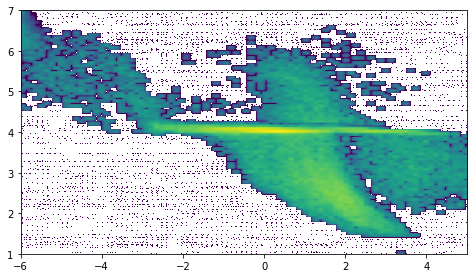

In [57]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(nfid), np.log10(Tfid), mfid, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))


[Text(0.5, 0, 'log n (cc)'), Text(0, 0.5, 'logT (K)')]

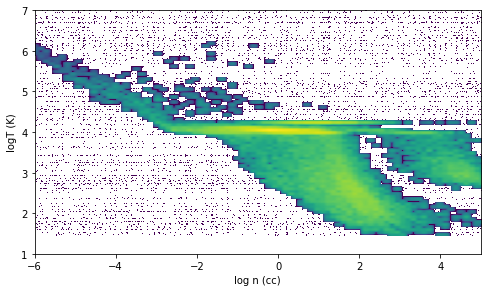

In [116]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(nnew), np.log10(Tnew), mnew, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))
ax.set(xlabel='log n (cc)', ylabel='logT (K)')


[(-6.0, 5.0), (1.0, 7.0)]

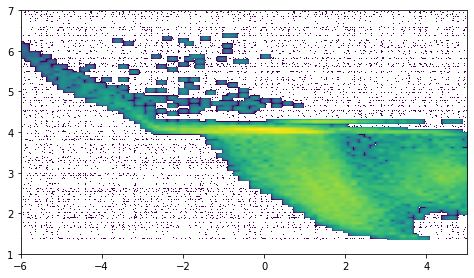

In [59]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(nNgb), np.log10(TNgb), mNgb, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))


[(-6.0, 5.0), (1.0, 7.0)]

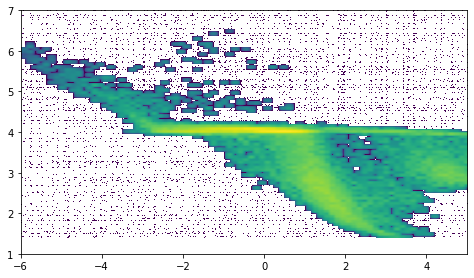

In [60]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(nLM), np.log10(TLM), mLM, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))


[(-6.0, 5.0), (1.0, 7.0)]

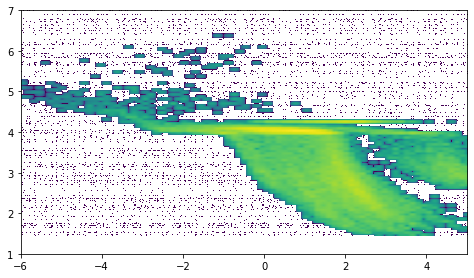

In [72]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(npi), np.log10(Tpi), mpi, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))


In [118]:
sn = snnew
pos = sn.part0.pos.value - np.array([50, 50, 50])
r= np.linalg.norm(pos, axis=1)
key = r < 0.15

print(np.sum(sn.part0.sfr[key]))
print(np.sum(sn.part0.sfr))

4.444194
5.3634157


In [119]:
sn.NumPart_Total[2]*sn.MassTable[2]

0.29948851 1e+10 Msol

In [128]:
np.max(sn.part0.GFM_Metallicity[key])

0.0127

In [123]:
np.mean(sn.part0.GFM_Metallicity)

0.011340579

[Text(0.5, 0, 'log n (cc)'), Text(0, 0.5, 'logT (K)')]

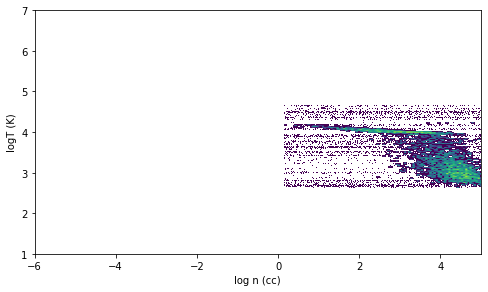

In [129]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(nnew[key]), np.log10(Tnew[key]), mnew[key], statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))
ax.set(xlabel='log n (cc)', ylabel='logT (K)')


In [124]:
sn0 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4/output', 0, combineFiles=True)

In [127]:
np.min(sn0.part0.GFM_Metallicity[sn0.part0.GFM_Metallicity > 0])

0.0127

### MW3

In [4]:
sn = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3/output', 50, combineFiles=True)

In [5]:
T = compute_T(sn)
n = compute_n(sn)
m = sn.part0.mass.value

[Text(0.5, 0, 'logn (cm^-3)'), Text(0, 0.5, 'logT (K)')]

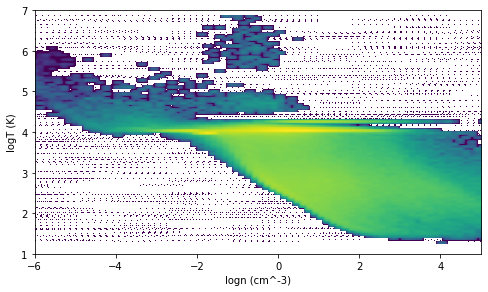

In [15]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n), np.log10(T), m, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))

ax.set(xlabel='logn (cm^-3)', ylabel='logT (K)')


In [7]:
boolT = np.logical_and(np.log10(T) > 3, np.log10(T) < 3.8)
booln = np.logical_and(np.log10(n) > 3, np.log10(n) < 5)

key = np.logical_and(boolT, booln)
pos = sn.part0.pos.value - np.array([50, 50, 50])


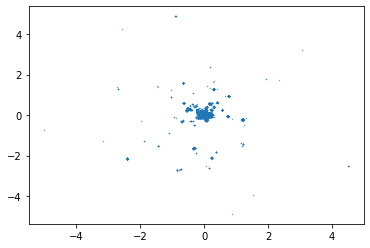

In [10]:
plt.scatter(pos[:,0][key], pos[:,1][key], s=0.1)